# Neuronale Netze

## Aufgabe 1: Tensorflow Playground

Wir möchten uns mit dem Verhalten von neuronalen Netzen vertraut machen

1. Gehen Sie auf https://playground.tensorflow.org 
2. Machen Sie sich mit den Features vertraut
3. Was kodieren die Farben Blau und Orange?

Blau zeigt positive Werte und Orange negative Werte. Sowohl bei den Gewichten als im Output. 

4. Wie werden die Punkte klassifiziert?

Wie in der Vorlesung gezeigt wird bei binärer Klassifikation die Sigmoid Funktion verwendet und anschließend ein Tresholding (um auf -1 oder 1 zu runden)

5. Wie können Sie sehen welche Feature Importance das Modell errechnet hat?

Die Größe der Gewichte entspricht der dicke der Linien im Modell, um so größer (im Absolutbetrag) diese sind um so wichtiger erachtet das Modell diese.

6. Welche der gezeigten Feature Engineering Methoden kennen Sie bereits?

Implementiert haben wir bereits die Polynomiellen Features $X_1^2$, $X_2^2$, $X_1 X_2$. $sin(X_1), sin(X_2)$ haben wir nicht explizit gesehen. Dieses ist hilfreich, wenn die Daten spiralförmig angeordnet sind.

7. Versuchen Sie verschiedene Parameter auf verschiedenen Datensätzen und beobachten Sie die Modelle um ein Gefühl für das Verhalten zu bekommen.

    - Generell gilt: mehr Layer und Neuronen sorgen für flexiblere Modelle, aber das Training dauert lang. Regularisierung ist bei vielen Layern und Neuronen wichtig. Die Learning Rate kann zu hoch eingestellt sein, dass konvergiert das Modell nicht. Wenn die LR zu gering ist konvergiert das Modell nur sehr langsam. 

    - Man kann den Variance / Bias Tradeoff für viele Parameter gut sehen. 

    - Das Training mit ReLU ist schneller als mit z.B. tanh.

8. Deep Learning. Wenn Sie die Anzahl der Hidden Layer stark erhöhen spricht man von _Deep Learning_. Probieren Sie aus ob Sie mit Deep Learning und nur den Features $X_1$ und $X_2$ die spiralförmigen Datensätze separieren können.

Die vielen Layer sorgen dafür, dass das Modell deutlich flexibler wird und somit auch Sinus und Kosinus approximiert werden kann. Deep Learning ist sehr mächtig, neight aber auch wie die Random Forests zu overfitting. Zudem kommen Schwierigkeiten beim Training der Modelle (vanishing / exploding Gradients, sehr große Modelle die nur langsam Trainieren) und noch vieles mehr. Die meisten Probleme sind heutzutage aber lösbar und haben Mitigationsstrategien.

# Aufgabe 2: MNIST

MNIST steht für Modified National Institute of Standards and Technology database und enthält Bilder von Zahlen die von Handschriften stammen. Diese mit neuronalen Netzen zu erkennen gilt als das "Hello World" von Bilderkennung mit Machine Learning.

1. Laden Sie die Daten und analysieren Sie diese (datentyp, plotting etc)
2. Machen Sie einen Test/Traning Split der Daten
3. Bauen Sie eine Pipeline mit dem `MLPClassifier`
4. Sehen Sie wie gut Sie abschneiden mit verschiedenen Netztopologien und messen Sie diese mit `classification_report`. 

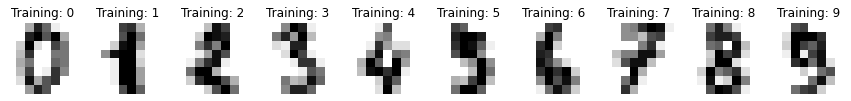

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

mnist = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 6))
for ax, image, label in zip(axes, mnist.images, mnist.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [2]:
n = len(mnist.images)
X = mnist.images.reshape((n, -1))  # flatten
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = MLPClassifier(random_state=0, max_iter=500)
pipe = Pipeline([("scaler", MinMaxScaler()), ("NN", clf)])
pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

print(metrics.classification_report(y_test, predicted, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        44
           1     1.0000    0.9773    0.9885        44
           2     1.0000    1.0000    1.0000        43
           3     1.0000    1.0000    1.0000        50
           4     1.0000    0.9800    0.9899        50
           5     1.0000    0.9388    0.9684        49
           6     0.9778    1.0000    0.9888        44
           7     0.9787    1.0000    0.9892        46
           8     1.0000    1.0000    1.0000        39
           9     0.9318    1.0000    0.9647        41

    accuracy                         0.9889       450
   macro avg     0.9888    0.9896    0.9890       450
weighted avg     0.9894    0.9889    0.9889       450



In [3]:
clf_deep = MLPClassifier(
    random_state=0, max_iter=500, hidden_layer_sizes=(100, 100, 100)
)

pipe_deep = Pipeline([("scaler", MinMaxScaler()), ("NN", clf_deep)])
pipe_deep.fit(X_train, y_train)

predicted_deep = pipe_deep.predict(X_test)

print(metrics.classification_report(y_test, predicted_deep, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        44
           1     0.9773    0.9773    0.9773        44
           2     1.0000    0.9767    0.9882        43
           3     1.0000    0.9800    0.9899        50
           4     1.0000    1.0000    1.0000        50
           5     0.9792    0.9592    0.9691        49
           6     0.9778    1.0000    0.9888        44
           7     1.0000    1.0000    1.0000        46
           8     0.9750    1.0000    0.9873        39
           9     0.9762    1.0000    0.9880        41

    accuracy                         0.9889       450
   macro avg     0.9885    0.9893    0.9889       450
weighted avg     0.9890    0.9889    0.9889       450



In [6]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("MLPClassifier", MLPClassifier(random_state=0, max_iter=300)),
    ]
)
grid = {
    "MLPClassifier__hidden_layer_sizes": [
        (50, 50, 50),
        (50, 100, 50),
        (100,),
        (100, 100, 100),
    ],
    "MLPClassifier__activation": ["tanh", "relu"],
    "MLPClassifier__alpha": [0.0001, 0.05],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, n_jobs=-1, verbose=1, cv=3)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'MLPClassifier__activation': 'relu',
 'MLPClassifier__alpha': 0.0001,
 'MLPClassifier__hidden_layer_sizes': (100, 100, 100)}

In [7]:
pipe_best = Pipeline(
    [("scaler", MinMaxScaler()), ("MLPClassifier", MLPClassifier(max_iter=500))]
)
pipe_best.set_params(**grid_search.best_params_)
pipe_best.fit(X_train, y_train)

predicted_best = pipe_best.predict(X_test)
print(metrics.classification_report(y_test, predicted_best, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        44
           1     0.9778    1.0000    0.9888        44
           2     1.0000    0.9767    0.9882        43
           3     1.0000    1.0000    1.0000        50
           4     1.0000    1.0000    1.0000        50
           5     1.0000    0.9592    0.9792        49
           6     0.9778    1.0000    0.9888        44
           7     1.0000    1.0000    1.0000        46
           8     1.0000    1.0000    1.0000        39
           9     0.9762    1.0000    0.9880        41

    accuracy                         0.9933       450
   macro avg     0.9932    0.9936    0.9933       450
weighted avg     0.9935    0.9933    0.9933       450

